<a href="https://colab.research.google.com/github/mqifjjfwiot/Assignments/blob/main/Cookapps/Cookapps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [249]:
pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [250]:
# 기본 라이브러리
import pandas as pd
import numpy as np
import scipy as sp

# 시간용 라이브러리
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

# 시각화 용 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.gridspec as gs
from sklearn.tree import plot_tree
import plotly.graph_objs as go

from sklearn.preprocessing import MinMaxScaler

# 학습용 라이브러리
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting

In [2]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [3]:
base_url = '/content/drive/MyDrive/Colab Notebooks/Assignments/Cookapps/Data/'

event_date : 결제 일자(YYYY-MM-DD)  
event_timestamp : 결제 당시 UTC timestamp  
custom_user_id : 유저 ID  
price : 상품 가격   
at : 상품 구매 위치  
product_id : 상품명   

In [4]:
df_i = pd.read_csv(base_url+'20221209_20230119_ZJ_IAP_data.csv')
df_i.iloc[:16]

,event_date,event_timestamp,custom_user_id,price,at,product_id
0,2021-03-09,1670545455,5630,1.99,Shop,dont_giveup_now1
1,2021-03-09,1670546768,5291,1.99,Shop,tiny_coin_pack
2,2021-03-09,1670547429,6016,9.99,Shop,small_delights
3,2021-03-09,1670548769,5962,1.99,Shop,warm_welcome_bundle
4,2021-03-09,1670548814,5744,1.99,Shop,tiny_coin_pack
5,2021-03-09,1670549929,5839,9.99,Shop,small_delights
6,2021-03-09,1670551149,5976,1.99,Shop,tiny_coin_pack
7,2021-03-09,1670551209,5781,2.99,Shop,brace_yourself
8,2021-03-09,1670551234,5806,1.99,Shop,warm_welcome_bundle
9,2021-03-09,1670551341,5092,5.99,Shop,breakthrough_bundle


category : 상품 분류군  
product_id(key) : 상품명  
price($) : 가격  
coin ~ heart(h) : 재화명, 해당 상품에 포함된 재화량  
impression_at : 상품 노출 지면  
purchase_condition : 구매 가능 조건  
purchase_limit : 구매 제한  

In [9]:
df_pi = pd.read_csv(base_url+'IAP_product_info.csv', encoding = 'CP949')
df_pi

,category,product_id(key),price($),coin,hammer,dart,roller,shuffle,rocket,rocket(h),TNT,TNT(h),wild,wild(h),heart(h),impression_at,purchase_condition,purchase_limit
0,Coin 1,tiny_coin_pack,1.99,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,상시,NaN
1,Coin 2,basic_coin_pack,7.99,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,상시,NaN
2,Coin 3,big_coin_pack,14.99,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,상시,NaN
3,Coin 4,large_coin_pack,29.99,25000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,상시,NaN
4,Coin 5,grand_coin_pack,54.99,50000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,상시,NaN
5,Coin 6,deluxe_coin_pack,99.99,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,상시,NaN
6,Store Bundle,breakthrough_bundle,5.99,2000.0,NaN,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,상시,NaN
7,Store Bundle,small_delights,9.99,5000.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,상시,NaN
8,Store Bundle,box_of_treats,19.99,10000.0,2.0,2.0,2.0,2.0,NaN,12.0,NaN,12.0,NaN,12.0,NaN,NaN,상시,NaN
9,Store Bundle,little_luxuries,39.99,25000.0,4.0,4.0,4.0,4.0,NaN,24.0,NaN,24.0,NaN,24.0,6.0,NaN,상시,NaN


# 상품 설명서

In [ ]:
df_ = pd.read_excel(base_url+'IAP_ZoeysJourney_과제용.xlsx')
df_

,IAP_ZoeysJourney_과제용,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,category,Product ID(Key),Product Name(ENG),Product Name(KOR),Price($),Coin,Hammer,Dart,Roller,Shuffle,Rocket,Rocket(h),TNT,TNT(h),Wild,Wild(h),Heart(h),노출지면,구매 가능 조건,구매제한
1,Coin 1,tiny_coin_pack,Tiny Coin Pack,1000코인,1.99,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,상시,NaN
2,Coin 2,basic_coin_pack,Basic Coin Pack,5000코인,7.99,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,상시,NaN
3,Coin 3,big_coin_pack,Big Coin Pack,10000코인,14.99,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,상시,NaN
4,Coin 4,large_coin_pack,Large Coin Pack,25000코인,29.99,25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,상시,NaN
5,Coin 5,grand_coin_pack,Grand Coin Pack,50000코인,54.99,50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,상시,NaN
6,Coin 6,deluxe_coin_pack,Deluxe Coin Pack,100000코인,99.99,100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,상시,NaN
7,Store Bundle,breakthrough_bundle,Breakthrough Bundle,실속있는 선물 세트,5.99,2000,NaN,NaN,NaN,NaN,3,0,3,0,3,0,NaN,NaN,상시,NaN
8,Store Bundle,small_delights,Small Delights,작은 선물 세트,9.99,5000,1,1,1,1,3,1,3,1,3,1,NaN,NaN,상시,NaN
9,Store Bundle,box_of_treats,Box of Treats,아담한 선물 세트,19.99,10000,2,2,2,2,3,12,3,12,3,12,NaN,NaN,상시,NaN


### 데이터 사전 분석

In [6]:
# 데이터셋 분석용 함수 선언
def summary(df) : 
  print(f'데이터set 크기 : {df.shape}')
  sum = pd.DataFrame(df.dtypes, columns = ['데이터 타입'])
  sum['결측치 개수'] = df.isnull().sum().values
  sum['유니크값 종류 개수'] = df.nunique().values
  sum['첫 번째 데이터'] = df.loc[0].values
  sum['두 번째 데이터'] = df.loc[1].values
  sum['세 번째 데이터'] = df.loc[2].values
  sum['네 번째 데이터'] = df.loc[3].values
  sum['다섯 번째 데이터'] = df.loc[4].values

  sum = sum.reset_index()
  return sum

In [7]:
summary(df_i)

데이터set 크기 : (3379, 6)


,index,데이터 타입,결측치 개수,유니크값 종류 개수,첫 번째 데이터,두 번째 데이터,세 번째 데이터,네 번째 데이터,다섯 번째 데이터
0,event_date,object,0,42,2021-03-09,2021-03-09,2021-03-09,2021-03-09,2021-03-09
1,event_timestamp,int64,0,3338,1670545455,1670546768,1670547429,1670548769,1670548814
2,custom_user_id,int64,0,531,5630,5291,6016,5962,5744
3,price,float64,5,13,1.99,1.99,9.99,1.99,1.99
4,at,object,0,2,Shop,Shop,Shop,Shop,Shop
5,product_id,object,0,17,dont_giveup_now1,tiny_coin_pack,small_delights,warm_welcome_bundle,tiny_coin_pack


In [8]:
summary(df_pi)

데이터set 크기 : (19, 18)


,index,데이터 타입,결측치 개수,유니크값 종류 개수,첫 번째 데이터,두 번째 데이터,세 번째 데이터,네 번째 데이터,다섯 번째 데이터
0,category,object,0,8,Coin 1,Coin 2,Coin 3,Coin 4,Coin 5
1,product_id(key),object,0,19,tiny_coin_pack,basic_coin_pack,big_coin_pack,large_coin_pack,grand_coin_pack
2,price($),float64,0,14,1.99,7.99,14.99,29.99,54.99
3,coin,float64,1,12,1000.0,5000.0,10000.0,25000.0,50000.0
4,hammer,float64,9,6,NaN,NaN,NaN,NaN,NaN
5,dart,float64,9,6,NaN,NaN,NaN,NaN,NaN
6,roller,float64,9,6,NaN,NaN,NaN,NaN,NaN
7,shuffle,float64,9,6,NaN,NaN,NaN,NaN,NaN
8,rocket,float64,18,1,NaN,NaN,NaN,NaN,NaN
9,rocket(h),float64,11,6,NaN,NaN,NaN,NaN,NaN


In [97]:
# 가격이 기록되어 있지 않은 데이터 제거
df_i2 = df_i.dropna(subset=['price'], how='any', axis=0)
df_i2 = df_i2.reset_index(drop=True)
print(df_i2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3374 entries, 0 to 3373
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   event_date       3374 non-null   object 
 1   event_timestamp  3374 non-null   int64  
 2   custom_user_id   3374 non-null   int64  
 3   price            3374 non-null   float64
 4   at               3374 non-null   object 
 5   product_id       3374 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 158.3+ KB
None


In [98]:
print('상점에서 구매한 기록 : '+str(len(df_i2[df_i2['at'] == 'Shop']))+'건')
print('배너에서 구매한 기록 : '+str(len(df_i2[df_i2['at'] == 'Banner']))+'건')

상점에서 구매한 기록 : 3230건
배너에서 구매한 기록 : 144건


In [99]:
A = df_i2['at'] == 'Banner'
B = df_i2['product_id'] == 'vip_pass'
print('배너에서 구매한 vip_pass 기록 : '+str(len(df_i2[A & B]))+'건')

배너에서 구매한 vip_pass 기록 : 144건


In [100]:
pd.to_datetime(df_i2['event_date'][1])

Timestamp('2021-03-09 00:00:00')

In [117]:
# 새 칼럼 추가를 위해 데이터 프레임 카피
df_i3 = df_i2.copy()

In [118]:
# 'event_timestamp' 칼럼 UTC+0 으로 변환.
df_i3['event_timestamp_dt'] = pd.to_datetime(df_i3['event_timestamp'], unit='s')
df_i3

,event_date,event_timestamp,custom_user_id,price,at,product_id,event_timestamp_dt
0,2021-03-09,1670545455,5630,1.99,Shop,dont_giveup_now1,2022-12-09 00:24:15
1,2021-03-09,1670546768,5291,1.99,Shop,tiny_coin_pack,2022-12-09 00:46:08
2,2021-03-09,1670547429,6016,9.99,Shop,small_delights,2022-12-09 00:57:09
3,2021-03-09,1670548769,5962,1.99,Shop,warm_welcome_bundle,2022-12-09 01:19:29
4,2021-03-09,1670548814,5744,1.99,Shop,tiny_coin_pack,2022-12-09 01:20:14
...,...,...,...,...,...,...,...
3369,2023-04-19,1674167348,10859,1.99,Shop,tiny_coin_pack,2023-01-19 22:29:08
3370,2023-04-19,1674170171,11415,1.99,Shop,warm_welcome_bundle,2023-01-19 23:16:11
3371,2023-04-19,1674170732,10977,1.99,Shop,tiny_coin_pack,2023-01-19 23:25:32
3372,2023-04-19,1674171574,8843,9.99,Banner,vip_pass,2023-01-19 23:39:34


In [119]:
df_i3['event_timestamp_dt'][0]

Timestamp('2022-12-09 00:24:15')

In [120]:
df_i3['event_timestamp_dt'].min()

Timestamp('2022-12-09 00:24:15')

In [121]:
df_i3['event_timestamp_dt'].max()

Timestamp('2023-01-19 23:52:30')

In [122]:
# event_date 날짜로 통일. event_timestamp_dt에 일괄 3개월씩 추가 보정
# relativedelta는 timedelta와 달리 직접 DatetimeArray에 더할수 없었고 자료 크기가 수천건밖에 안되어 for문 활용함.
for i in range(len(df_i3)) : 
  df_i3['event_timestamp_dt'][i] += relativedelta(months = -21)
df_i3

<ipython-input-122-802dbabea774>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_i3['event_timestamp_dt'][i] += relativedelta(months = -21)


,event_date,event_timestamp,custom_user_id,price,at,product_id,event_timestamp_dt
0,2021-03-09,1670545455,5630,1.99,Shop,dont_giveup_now1,2021-03-09 00:24:15
1,2021-03-09,1670546768,5291,1.99,Shop,tiny_coin_pack,2021-03-09 00:46:08
2,2021-03-09,1670547429,6016,9.99,Shop,small_delights,2021-03-09 00:57:09
3,2021-03-09,1670548769,5962,1.99,Shop,warm_welcome_bundle,2021-03-09 01:19:29
4,2021-03-09,1670548814,5744,1.99,Shop,tiny_coin_pack,2021-03-09 01:20:14
...,...,...,...,...,...,...,...
3369,2023-04-19,1674167348,10859,1.99,Shop,tiny_coin_pack,2021-04-19 22:29:08
3370,2023-04-19,1674170171,11415,1.99,Shop,warm_welcome_bundle,2021-04-19 23:16:11
3371,2023-04-19,1674170732,10977,1.99,Shop,tiny_coin_pack,2021-04-19 23:25:32
3372,2023-04-19,1674171574,8843,9.99,Banner,vip_pass,2021-04-19 23:39:34


In [123]:
# 날짜 변환 했으니 새로 정의
df_i4 = df_i3[['event_timestamp_dt', 'custom_user_id' , 'price', 'at', 'product_id']]
df_i4

,event_timestamp_dt,custom_user_id,price,at,product_id
0,2021-03-09 00:24:15,5630,1.99,Shop,dont_giveup_now1
1,2021-03-09 00:46:08,5291,1.99,Shop,tiny_coin_pack
2,2021-03-09 00:57:09,6016,9.99,Shop,small_delights
3,2021-03-09 01:19:29,5962,1.99,Shop,warm_welcome_bundle
4,2021-03-09 01:20:14,5744,1.99,Shop,tiny_coin_pack
...,...,...,...,...,...
3369,2021-04-19 22:29:08,10859,1.99,Shop,tiny_coin_pack
3370,2021-04-19 23:16:11,11415,1.99,Shop,warm_welcome_bundle
3371,2021-04-19 23:25:32,10977,1.99,Shop,tiny_coin_pack
3372,2021-04-19 23:39:34,8843,9.99,Banner,vip_pass


In [124]:
# 조사 기점이 되는 날짜
base_dt = pd.to_datetime('2021-04-20 00:00:00')
base_dt

Timestamp('2021-04-20 00:00:00')

In [172]:
# Recency : 얼마나 최근 구매하였는가
df_i4['time_diff'] = base_dt - df_i4['event_timestamp_dt']
df_i5 = df_i4.copy()
df_i5

<ipython-input-172-eabc797c6d71>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_i4['time_diff'] = base_dt - df_i4['event_timestamp_dt']


,event_timestamp_dt,custom_user_id,price,at,product_id,time_diff
0,2021-03-09 00:24:15,5630,1.99,Shop,dont_giveup_now1,41 days 23:35:45
1,2021-03-09 00:46:08,5291,1.99,Shop,tiny_coin_pack,41 days 23:13:52
2,2021-03-09 00:57:09,6016,9.99,Shop,small_delights,41 days 23:02:51
3,2021-03-09 01:19:29,5962,1.99,Shop,warm_welcome_bundle,41 days 22:40:31
4,2021-03-09 01:20:14,5744,1.99,Shop,tiny_coin_pack,41 days 22:39:46
...,...,...,...,...,...,...
3369,2021-04-19 22:29:08,10859,1.99,Shop,tiny_coin_pack,0 days 01:30:52
3370,2021-04-19 23:16:11,11415,1.99,Shop,warm_welcome_bundle,0 days 00:43:49
3371,2021-04-19 23:25:32,10977,1.99,Shop,tiny_coin_pack,0 days 00:34:28
3372,2021-04-19 23:39:34,8843,9.99,Banner,vip_pass,0 days 00:20:26


In [174]:
df_r = df_i5.groupby('custom_user_id')['time_diff'].min()
df_r

custom_user_id
4830    12 days 03:25:09
4842    23 days 09:44:34
4881    38 days 05:07:59
4917    30 days 03:24:37
4932    17 days 07:54:31
              ...       
11405    1 days 06:28:56
11406    0 days 17:19:54
11409    0 days 06:54:26
11415    0 days 00:43:49
11488    0 days 09:16:58
Name: time_diff, Length: 531, dtype: timedelta64[ns]

In [175]:
df_r.describe()

count                           531
mean     17 days 02:19:01.491525423
std      12 days 20:55:39.300461871
min                 0 days 00:07:30
25%                 4 days 18:33:14
50%                16 days 01:19:43
75%         27 days 18:09:51.500000
max                41 days 23:35:45
Name: time_diff, dtype: object

In [163]:
# Frequency : 주문 빈도수 조사
df_f = df_i5.groupby('custom_user_id')['price'].count()
df_f

custom_user_id
4830     3
4842     1
4881     1
4917     5
4932     1
        ..
11405    3
11406    2
11409    1
11415    1
11488    1
Name: price, Length: 531, dtype: int64

In [164]:
df_f.max() 

154

In [165]:
df_f.describe()

count    531.000000
mean       6.354049
std       12.283248
min        1.000000
25%        1.000000
50%        2.000000
75%        6.000000
max      154.000000
Name: price, dtype: float64

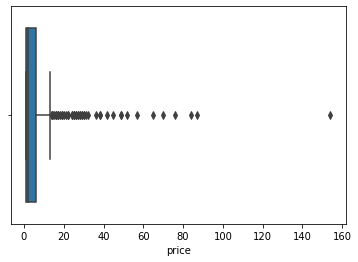

In [167]:
sns.boxplot(x=df_f)

In [156]:
# Monetary :  주문 총액 조사
df_m = df_i5.groupby('custom_user_id')['price'].sum()
df_m

custom_user_id
4830     39.97
4842      1.99
4881      1.99
4917     17.95
4932      2.99
         ...  
11405     5.97
11406    11.98
11409     1.99
11415     1.99
11488     1.99
Name: price, Length: 531, dtype: float64

In [168]:
df_m.describe()

count     531.000000
mean       32.572994
std        88.059822
min         1.990000
25%         2.990000
50%         9.990000
75%        23.960000
max      1265.460000
Name: price, dtype: float64

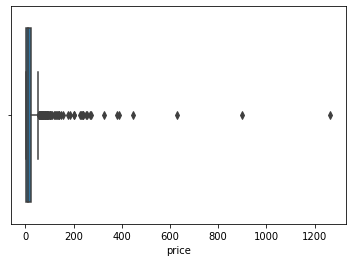

In [169]:
sns.boxplot(x=df_m)

In [160]:
df_m2 = df_i4.groupby('custom_user_id')['price'].count()
df_m2.max()

154

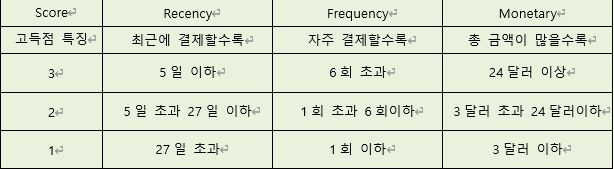

In [178]:
# 스코어링 준비
df_i5

,event_timestamp_dt,custom_user_id,price,at,product_id,time_diff
0,2021-03-09 00:24:15,5630,1.99,Shop,dont_giveup_now1,41 days 23:35:45
1,2021-03-09 00:46:08,5291,1.99,Shop,tiny_coin_pack,41 days 23:13:52
2,2021-03-09 00:57:09,6016,9.99,Shop,small_delights,41 days 23:02:51
3,2021-03-09 01:19:29,5962,1.99,Shop,warm_welcome_bundle,41 days 22:40:31
4,2021-03-09 01:20:14,5744,1.99,Shop,tiny_coin_pack,41 days 22:39:46
...,...,...,...,...,...,...
3369,2021-04-19 22:29:08,10859,1.99,Shop,tiny_coin_pack,0 days 01:30:52
3370,2021-04-19 23:16:11,11415,1.99,Shop,warm_welcome_bundle,0 days 00:43:49
3371,2021-04-19 23:25:32,10977,1.99,Shop,tiny_coin_pack,0 days 00:34:28
3372,2021-04-19 23:39:34,8843,9.99,Banner,vip_pass,0 days 00:20:26


In [226]:
# 그룹화
# 위에서 했던것
grouped = df_i5.groupby('custom_user_id')
df_i5_g = grouped.agg({'time_diff':'min', 'price':['count','sum']})
print(df_i5_g)

                      time_diff price       
                            min count    sum
custom_user_id                              
4830           12 days 03:25:09     3  39.97
4842           23 days 09:44:34     1   1.99
4881           38 days 05:07:59     1   1.99
4917           30 days 03:24:37     5  17.95
4932           17 days 07:54:31     1   2.99
...                         ...   ...    ...
11405           1 days 06:28:56     3   5.97
11406           0 days 17:19:54     2  11.98
11409           0 days 06:54:26     1   1.99
11415           0 days 00:43:49     1   1.99
11488           0 days 09:16:58     1   1.99

[531 rows x 3 columns]


In [227]:
df_i5_g['price']['sum']

custom_user_id
4830     39.97
4842      1.99
4881      1.99
4917     17.95
4932      2.99
         ...  
11405     5.97
11406    11.98
11409     1.99
11415     1.99
11488     1.99
Name: sum, Length: 531, dtype: float64

In [228]:
df_i5_g['time_diff']

,min
custom_user_id,
4830,12 days 03:25:09
4842,23 days 09:44:34
4881,38 days 05:07:59
4917,30 days 03:24:37
4932,17 days 07:54:31
...,...
11405,1 days 06:28:56
11406,0 days 17:19:54
11409,0 days 06:54:26


In [229]:
df_i5_g['time_diff']['min']

custom_user_id
4830    12 days 03:25:09
4842    23 days 09:44:34
4881    38 days 05:07:59
4917    30 days 03:24:37
4932    17 days 07:54:31
              ...       
11405    1 days 06:28:56
11406    0 days 17:19:54
11409    0 days 06:54:26
11415    0 days 00:43:49
11488    0 days 09:16:58
Name: min, Length: 531, dtype: timedelta64[ns]

In [230]:
df_i5_g.columns = ['Recency','Frequency','Monetary']
df_i5_g[['Recency_score', 'Frequency_score', 'Monetary_score']] = 0
df_i5_g

,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score
custom_user_id,,,,,,
4830,12 days 03:25:09,3,39.97,0,0,0
4842,23 days 09:44:34,1,1.99,0,0,0
4881,38 days 05:07:59,1,1.99,0,0,0
4917,30 days 03:24:37,5,17.95,0,0,0
4932,17 days 07:54:31,1,2.99,0,0,0
...,...,...,...,...,...,...
11405,1 days 06:28:56,3,5.97,0,0,0
11406,0 days 17:19:54,2,11.98,0,0,0
11409,0 days 06:54:26,1,1.99,0,0,0


In [231]:
df_i5_g2 = df_i5_g.copy()
df_i5_g2.reset_index(inplace=True)
df_i5_g2

,custom_user_id,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score
0,4830,12 days 03:25:09,3,39.97,0,0,0
1,4842,23 days 09:44:34,1,1.99,0,0,0
2,4881,38 days 05:07:59,1,1.99,0,0,0
3,4917,30 days 03:24:37,5,17.95,0,0,0
4,4932,17 days 07:54:31,1,2.99,0,0,0
...,...,...,...,...,...,...,...
526,11405,1 days 06:28:56,3,5.97,0,0,0
527,11406,0 days 17:19:54,2,11.98,0,0,0
528,11409,0 days 06:54:26,1,1.99,0,0,0
529,11415,0 days 00:43:49,1,1.99,0,0,0


In [237]:
# for문 돌리기 용의하게 인덱스는 리셋. 
# 스코어링용 함수 선언
def scoring(i) : 
  r, f, m = 0, 0, 0
  
  # Recency. 5, 27
  if df_i5_g2['Recency'][i] <= timedelta(days= 5) : 
    r = 3
  elif df_i5_g2['Recency'][i] > timedelta(days= 27) :
    r = 1
  else : 
    r = 2

  # Frequency. 1, 6
  if df_i5_g2['Frequency'][i] <= 1 : 
    f = 1
  elif df_i5_g2['Frequency'][i] > 6:
    f = 3
  else : 
    f = 2

  # Monetary. 3, 24
  if df_i5_g2['Monetary'][i] <= 3 : 
    m = 1
  elif df_i5_g2['Monetary'][i] > 24:
    m = 3
  else : 
    m = 2

  return r, f, m

In [238]:
# for문 처리, 스코어 입력
df_i5_g3 = df_i5_g2.copy()
for i in range(len(df_i5_g3)) : 
  # ['Recency_score',	'Frequency_score',	'Monetary_score']
  df_i5_g3['Recency_score'][i], df_i5_g3['Frequency_score'][i], df_i5_g3['Monetary_score'][i] = scoring(i)


df_i5_g3

<ipython-input-238-644885cfcc14>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_i5_g3['Recency_score'][i], df_i5_g3['Frequency_score'][i], df_i5_g3['Monetary_score'][i] = scoring(i)


,custom_user_id,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score
0,4830,12 days 03:25:09,3,39.97,2,2,3
1,4842,23 days 09:44:34,1,1.99,2,1,1
2,4881,38 days 05:07:59,1,1.99,1,1,1
3,4917,30 days 03:24:37,5,17.95,1,2,2
4,4932,17 days 07:54:31,1,2.99,2,1,1
...,...,...,...,...,...,...,...
526,11405,1 days 06:28:56,3,5.97,3,2,2
527,11406,0 days 17:19:54,2,11.98,3,2,2
528,11409,0 days 06:54:26,1,1.99,3,1,1
529,11415,0 days 00:43:49,1,1.99,3,1,1


In [248]:
# 각 그룹간 고객 분포도 파악
df_i5_g4 = df_i5_g3.copy()
group2 = df_i5_g4.groupby(['Recency_score', 'Frequency_score', 'Monetary_score'])
group2['custom_user_id', 'Recency'].count()

<ipython-input-248-1922270103c5>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group2['custom_user_id', 'Recency'].count()


custom_user_id  Recency
Recency_score Frequency_score Monetary_score                         
1             1               1                           51       51
                              2                           13       13
              2               2                           64       64
                              3                           10       10
              3               2                            1        1
                              3                           11       11
2             1               1                           67       67
                              2                           15       15
              2               2                          100      100
                              3                           12       12
              3               2                            7        7
                              3                           46       46
3             1               1                           21       21
                              2                            3        3
              2               2                           52       52
                              3                            8        8
              3               2                            6        6
                              3                           44       44

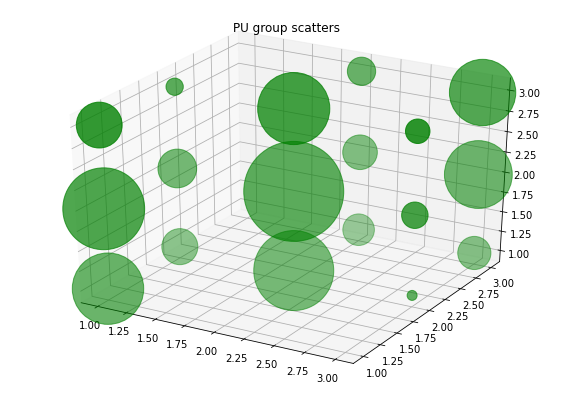

In [263]:
from mpl_toolkits import mplot3d

size = [5100, 1300, 0, 0, 6400, 1000, 0, 100, 1100, 6700, 1500, 0, 0, 10000, 1200, 0, 700, 4600, 2100, 300, 0, 0, 5200, 800, 0, 600, 4400]

# dataset
z = [1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3]
x = [1,1,1,2,2,2,3,3,3,1,1,1,2,2,2,3,3,3,1,1,1,2,2,2,3,3,3]
y = [1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3]
 
# figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(x, y, z, s= size, color = "green")
plt.title("PU group scatters")
 
# show plot
plt.show()